# NAME : RITESH SUNIL RAHATAL
# STUDENT ID : 730061105
# LEARNING FROM DATA COURSEWORK

# Loan Prediction Analysis

The objective of this system is to predict either a person is eligible to apply for Loan or Not based on certain parameters or attributes like gender,marital status,employment,Income,credit history etc.
The Prediction algorithm used for the system's implementation are Logistic Regression, Random Forest and Decision Tree. 
 
 
Rows : 614

Columns : 13

Dataset : Kaggle


In [1]:

#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
# Load the dataset
data = "train.csv"  # Replace with the actual URL or path to your dataset
df = pd.read_csv(data)

In [3]:
df.head(10)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [4]:
# Drop Loan_ID column as it is not useful for modeling
df = df.drop(columns=['Loan_ID'])

In [5]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
# Impute missing values for Gender
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)

In [8]:
# Impute missing values for Married 
df['Married'].fillna(df['Married'].mode()[0],inplace=True)

In [9]:
# Impute missing values for Dependents
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)

In [10]:
# Impute missing values for Self_Employed
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

In [11]:
# Impute missing values for LoanAmount
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())


In [12]:
# Impute missing values for Loan_Amount_Term
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [13]:
# Impute missing values for Credit_History
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)

In [14]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [15]:
# Handling Dependents column (converting '3+' to 3)
df['Dependents'] = df['Dependents'].replace('3+', 3).astype(float)

In [16]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
5,Male,Yes,2.0,Graduate,Yes,5417,4196.0,267.000000,360.0,1.0,Urban,Y
6,Male,Yes,0.0,Not Graduate,No,2333,1516.0,95.000000,360.0,1.0,Urban,Y
7,Male,Yes,3.0,Graduate,No,3036,2504.0,158.000000,360.0,0.0,Semiurban,N
8,Male,Yes,2.0,Graduate,No,4006,1526.0,168.000000,360.0,1.0,Urban,Y
9,Male,Yes,1.0,Graduate,No,12841,10968.0,349.000000,360.0,1.0,Semiurban,N


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.7+ KB


In [18]:
# Summary of numerical variables for training data set
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,146.412162,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.037468,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


1.For the non-numerical values (e.g. Property_Area, Credit_History etc.),I have looked at frequency distribution to understand whether they make sense or not.

In [19]:
# Get the unique values and their frequency of variable Property_Area

df['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [20]:
pd.crosstab(df['Property_Area'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Property_Area,,,
Rural,69,110,179
Semiurban,54,179,233
Urban,69,133,202
All,192,422,614


In [21]:
# Loan approval rates in absolute numbers
loan_approval = df['Loan_Status'].value_counts()['Y']
print('Total no of Loans Approved :',loan_approval)

Total no of Loans Approved : 422


In [22]:
# Credit History and Loan Status
pd.crosstab(df['Credit_History'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,110,415,525
All,192,422,614


In [23]:
pd.crosstab(df['Education'],df['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Education,,,
Graduate,140,340,480
Not Graduate,52,82,134
All,192,422,614


Understanding Distribution of Numerical Variables

1.ApplicantIncome

2.LoanAmount

# Understanding the Outliers and treatment

<Axes: >

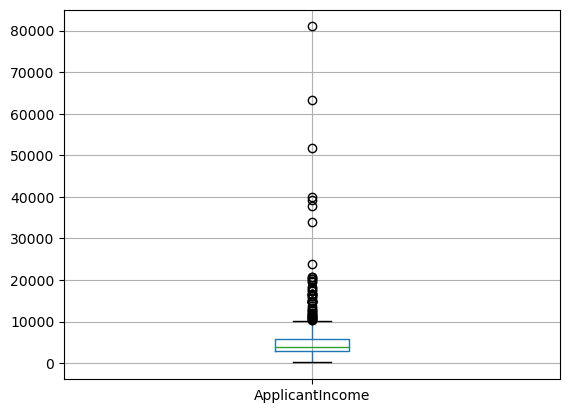

In [24]:
# Box Plot for variable ApplicantIncome of training data set
df.boxplot(column='ApplicantIncome')

 #### The above Box Plot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

<Axes: >

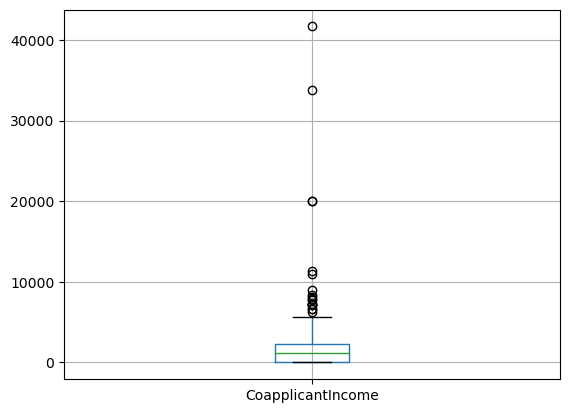

In [25]:
# Box Plot for variable CoapplicantIncome of training data set
df.boxplot(column='CoapplicantIncome')

<Axes: >

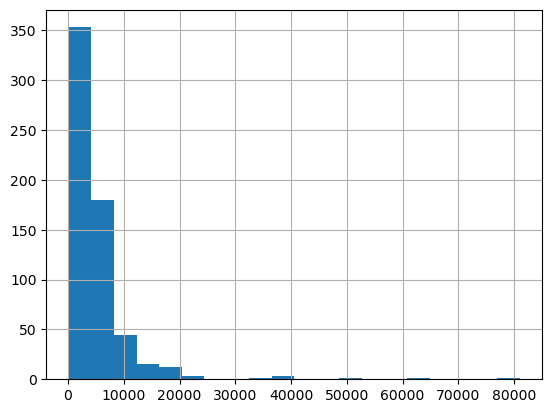

In [26]:
# Histogram of variable ApplicantIncome
df['ApplicantIncome'].hist(bins=20)

<Axes: >

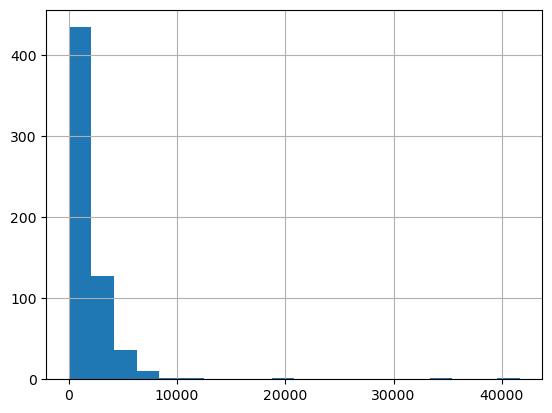

In [27]:
# Histogram of variable CoapplicantIncome
df['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

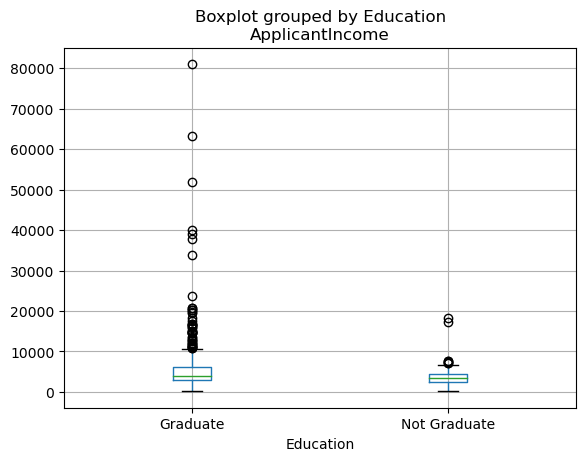

In [28]:
# Box Plot for variable ApplicantIncome by variable Education of training data set
df.boxplot(column='ApplicantIncome', by= 'Education')

#### We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers

<Axes: >

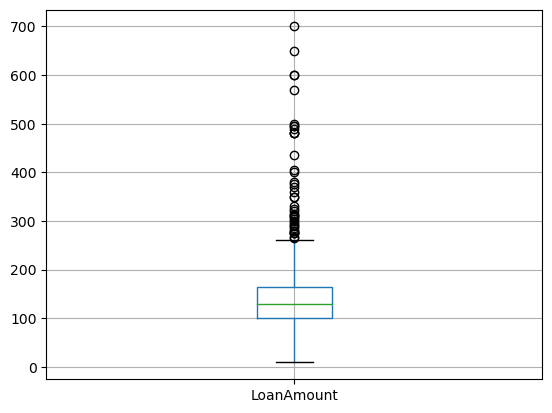

In [29]:
df.boxplot(column='LoanAmount')

#### LoanAmount has missing as well as extreme values, while ApplicantIncome has a few extreme values

<Axes: >

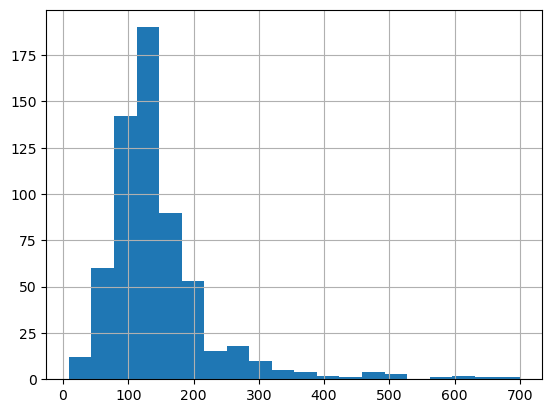

In [30]:
# Histogram of variable LoanAmount
df['LoanAmount'].hist(bins=20)

#### The extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let’s try a log transformation to nullify their effect

<Axes: >

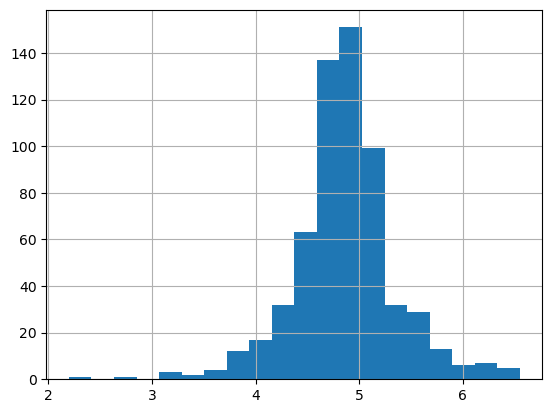

In [31]:
# Perform log transformation of TLoanAmount to make it closer to normal
df['Loanamt_log']=np.log(df['LoanAmount'])
# Histogram of variable LoanAmount
df['Loanamt_log'].hist(bins=20)

In [32]:
# Add both ApplicantIncome and CoapplicantIncome to TotalIncome
df['TotalIncome']= df['ApplicantIncome'] + df['CoapplicantIncome']
# Perform log transformation of TotalIncome to make it closer to normal
df['TotalIncome_log']= np.log(df['TotalIncome'])

<Axes: >

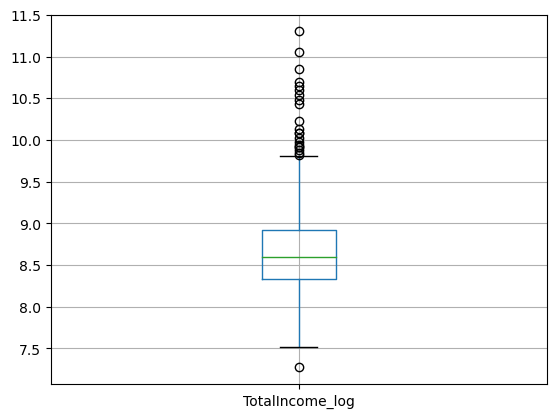

In [33]:
# Box Plot for variable TotalIncome of training data set
df.boxplot(column='TotalIncome_log')

<Axes: >

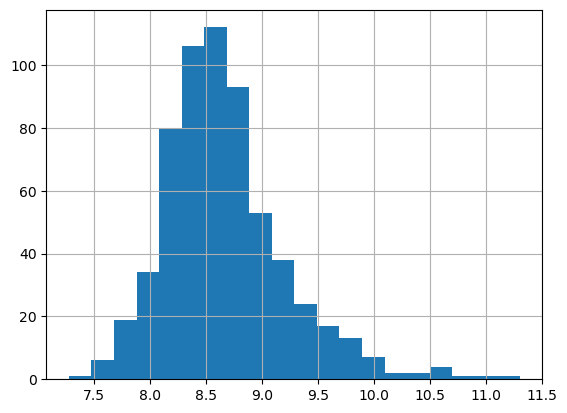

In [34]:
# Looking at the distribtion of TotalIncome
df['TotalIncome_log'].hist(bins=20)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    float64
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
 12  Loanamt_log        614 non-null    float64
 13  TotalIncome        614 non-null    float64
 14  TotalIncome_log    614 non-null    float64
dtypes: float64(8), int64(1), object(6)
memory usage: 72.1+ KB


In [36]:
# Selecting Attribute Data for Model Training
x= df.iloc[:,np.r_[0:4,8:10,12:14]].values
y= df.iloc[:,11].values

In [37]:
#print x
x

array([['Male', 'No', 0.0, ..., 1.0, 4.986425672954842, 5849.0],
       ['Male', 'Yes', 1.0, ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', 0.0, ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', 1.0, ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', 2.0, ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', 0.0, ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [38]:
#print y
y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

In [39]:
#Dividing the training dataset(80%) in train and test sets(20%) 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
print(x_train)

[['Male' 'Yes' 0.0 ... 1.0 5.579729825986222 8250.0]
 ['Male' 'Yes' 0.0 ... 1.0 4.875197323201151 5858.0]
 ['Male' 'Yes' 2.0 ... 1.0 5.3471075307174685 7945.0]
 ...
 ['Female' 'No' 0.0 ... 1.0 3.4011973816621555 3237.0]
 ['Female' 'Yes' 0.0 ... 1.0 4.986425672954842 10047.0]
 ['Male' 'Yes' 0.0 ... 1.0 4.986425672954842 13650.0]]


In [41]:
#To convert the categorical values into numerical values
from sklearn.preprocessing import LabelEncoder
labelencoder_x = LabelEncoder()

In [42]:
#for loop for conversion of first 5 attributes
for i in range(0,5):
    x_train[:,i]= labelencoder_x.fit_transform(x_train[:,i])

In [43]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [44]:
x_train

array([[1, 1, 0, ..., 1.0, 5.579729825986222, 346],
       [1, 1, 0, ..., 1.0, 4.875197323201151, 258],
       [1, 1, 2, ..., 1.0, 5.3471075307174685, 341],
       ...,
       [0, 0, 0, ..., 1.0, 3.4011973816621555, 43],
       [0, 1, 0, ..., 1.0, 4.986425672954842, 381],
       [1, 1, 0, ..., 1.0, 4.986425672954842, 414]], dtype=object)

In [45]:
labelencoder_y = LabelEncoder()
y_train= labelencoder_y.fit_transform(y_train)

In [46]:
y_train

array([0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,

In [47]:
for i in range(0,5):
    x_test[:,i]= labelencoder_x.fit_transform(x_test[:,i])

In [48]:
x_train[:,7]= labelencoder_x.fit_transform(x_train[:,7])

In [49]:

labelencoder_y = LabelEncoder()
y_test= labelencoder_y.fit_transform(y_test)

In [50]:
x_test

array([[1, 1, 0, 0, 3, 1.0, 5.429345628954441, 9083.0],
       [1, 1, 0, 0, 3, 1.0, 4.867534450455582, 4310.0],
       [1, 1, 2, 0, 3, 1.0, 5.062595033026967, 5614.0],
       [0, 0, 0, 0, 3, 1.0, 4.2626798770413155, 2900.0],
       [1, 0, 0, 0, 3, 1.0, 4.248495242049359, 2718.0],
       [1, 1, 1, 0, 3, 1.0, 4.672828834461906, 4014.0],
       [1, 1, 2, 0, 3, 1.0, 4.787491742782046, 3717.0],
       [1, 1, 0, 0, 3, 1.0, 4.189654742026425, 3000.0],
       [1, 1, 3, 1, 3, 1.0, 5.153291594497779, 4234.0],
       [1, 1, 1, 0, 3, 1.0, 4.700480365792417, 4022.0],
       [1, 1, 2, 0, 3, 0.0, 4.276666119016055, 5000.0],
       [1, 1, 0, 0, 3, 1.0, 5.030437921392435, 5203.0],
       [1, 1, 3, 1, 4, 1.0, 4.543294782270004, 2825.0],
       [1, 1, 2, 1, 3, 1.0, 4.986425672954842, 5191.0],
       [1, 1, 2, 0, 3, 1.0, 4.477336814478207, 6816.0],
       [1, 1, 0, 0, 2, 1.0, 4.553876891600541, 6046.0],
       [1, 0, 0, 0, 3, 1.0, 4.07753744390572, 2479.0],
       [1, 0, 0, 0, 3, 1.0, 5.017279836814924, 8

In [51]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1])

In [52]:
#Scaling the training dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_train=ss.fit_transform(x_train)
x_test=ss.fit_transform(x_test)

# Logistic Regression

In [53]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [54]:
# Create and train a Logistic Regression model
model = LogisticRegression()
model.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(x_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Logistic Regression Accuracy: {accuracy:.2f}')

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.2f}')
print(f'Recall: {recall:.2f}')
print(f'F1 Score: {f1:.2f}')
print('Confusion Matrix:')
print(conf_matrix)

Logistic Regression Accuracy: 0.79
Precision: 0.76
Recall: 0.99
F1 Score: 0.86
Confusion Matrix:
[[18 25]
 [ 1 79]]


# Decision Tree

In [77]:
#checking accuracy for Decision Tree Algorithm
from sklearn.tree import DecisionTreeClassifier
DTClassifier= DecisionTreeClassifier(criterion='entropy',max_depth=None)
#Training the model
DTClassifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [78]:
#predicting the values of x_test
y_pred= DTClassifier.predict(x_test)
y_pred

array([0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1])

In [79]:
#calculating accuracy for decision tree algorithm
from sklearn import metrics
print('The accuracy of decision tree is : ',metrics.accuracy_score(y_pred,y_test))

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)

The accuracy of decision tree is :  0.6341463414634146
Precision: 0.7215
Recall: 0.7125
F1 Score: 0.7170
Confusion Matrix:
[[21 22]
 [23 57]]


# Random Forest

In [58]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest Classifier
RFClassifier = RandomForestClassifier(n_estimators=100)

# Training the model
RFClassifier.fit(x_train, y_train)

# Making predictions on the testing set
y_pred_rf = RFClassifier.predict(x_test)

# Checking accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Printing the accuracy
print("Random Forest Accuracy:", accuracy_rf)

precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1:.4f}')
print('Confusion Matrix:')
print(conf_matrix)


Random Forest Accuracy: 0.7723577235772358
Precision: 0.7308
Recall: 0.7125
F1 Score: 0.7215
Confusion Matrix:
[[22 21]
 [23 57]]


# Prediction for Testing Dataset 

In [234]:
LoanEligible = ['Congratulations your eligible for loan', 'Sorry! your not eligible for loan']

In [235]:
attributes = ['Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area']

In [236]:
df.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
df.replace({'Married':{'Yes':1,'No':0}},inplace=True)
df.replace({'Dependents':{'+3':0,'3+':1}},inplace=True)
df.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)
df.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
df.replace({'Property_Area':{'Urban':0,'Rural':1, 'Semiurban': 2}},inplace=True)
df.replace({'Loan_Status':{'Y':1,'N':0}},inplace=True)
df = df.fillna(0)

In [237]:
df.head(10)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Loanamt_log,TotalIncome,TotalIncome_log
0,0,0,0.0,1,0,5849,0.0,146.412162,360.0,1.0,0,1,4.986426,5849.0,8.674026
1,0,1,1.0,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,4.852030,6091.0,8.714568
2,0,1,0.0,1,1,3000,0.0,66.000000,360.0,1.0,0,1,4.189655,3000.0,8.006368
3,0,1,0.0,0,0,2583,2358.0,120.000000,360.0,1.0,0,1,4.787492,4941.0,8.505323
4,0,0,0.0,1,0,6000,0.0,141.000000,360.0,1.0,0,1,4.948760,6000.0,8.699515
5,0,1,2.0,1,1,5417,4196.0,267.000000,360.0,1.0,0,1,5.587249,9613.0,9.170872
6,0,1,0.0,0,0,2333,1516.0,95.000000,360.0,1.0,0,1,4.553877,3849.0,8.255569
7,0,1,3.0,1,0,3036,2504.0,158.000000,360.0,0.0,2,0,5.062595,5540.0,8.619750
8,0,1,2.0,1,0,4006,1526.0,168.000000,360.0,1.0,0,1,5.123964,5532.0,8.618305
9,0,1,1.0,1,0,12841,10968.0,349.000000,360.0,1.0,2,0,5.855072,23809.0,10.077819


In [238]:
X= df[attributes]
X.columns = attributes  # Ensure X has valid feature names
Y = df[["Loan_Status"]].values.ravel()
np.ravel(Y)

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0,

In [239]:
print(X.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')


In [240]:
testdata= pd.read_csv("test.csv")

In [241]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [242]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [243]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [244]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0],inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0],inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0],inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0],inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0],inplace=True)

In [245]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

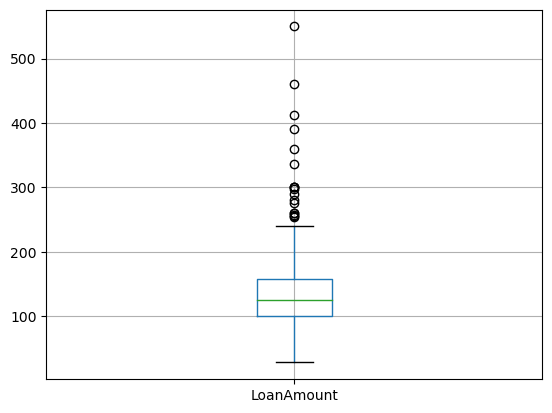

In [246]:
testdata.boxplot(column='LoanAmount')

<Axes: >

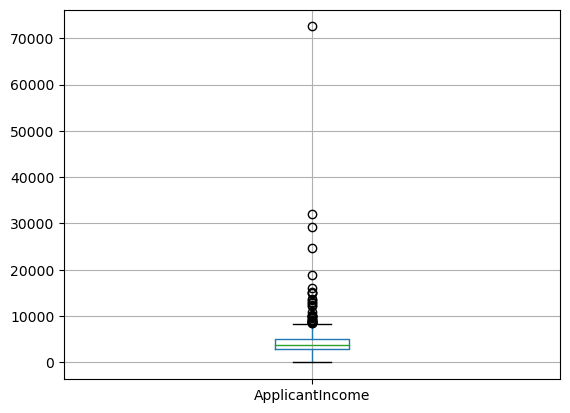

In [247]:
testdata.boxplot(column='ApplicantIncome')

In [248]:
testdata.LoanAmount = df.LoanAmount.fillna(testdata.LoanAmount.mean())

In [249]:
testdata['Loanamt_log']=np.log(testdata['LoanAmount'])

In [250]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loanamt_log          0
dtype: int64

In [251]:
testdata['TotalIncome']= testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_log']= np.log(testdata['TotalIncome'])

<Axes: >

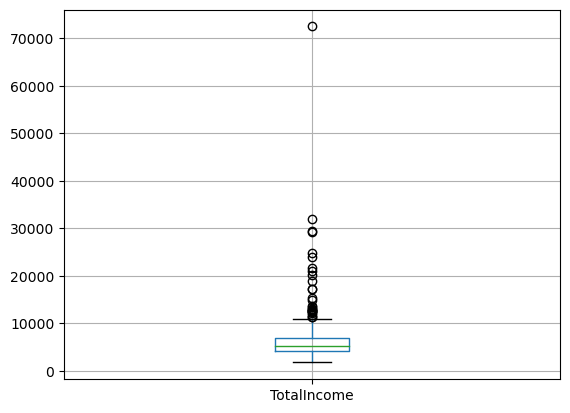

In [252]:
testdata.boxplot(column='TotalIncome')

In [253]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loanamt_log,TotalIncome,TotalIncome_log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,146.412162,360.0,1.0,Urban,4.986426,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,128.000000,360.0,1.0,Urban,4.852030,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,66.000000,360.0,1.0,Urban,4.189655,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,120.000000,360.0,1.0,Urban,4.787492,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,141.000000,360.0,1.0,Urban,4.948760,3276,8.094378


In [254]:
testdata.replace({'Gender':{'Male':0,'Female':1}},inplace=True)
testdata.replace({'Married':{'Yes':1,'No':0}},inplace=True)
testdata.replace({'Dependents':{'+3':0,'3+':1}},inplace=True)
testdata.replace({'Education':{'Not Graduate':0,'Graduate':1}},inplace=True)
testdata.replace({'Self_Employed':{'No':0,'Yes':1}},inplace=True)
testdata.replace({'Property_Area':{'Urban':0,'Rural':1, 'Semiurban': 2}},inplace=True)
testdata = testdata.fillna(0)

In [255]:
X_test= testdata[attributes]
# Assuming df_test is your testing DataFrame

X_test.columns = attributes  # If you have set feature names for training, do the same for testing


## I have got accuracy for Logistic Regression: 0.79, Decision tree:  0.6341 and Random Forest: 0.7723 for training data. 
## As i got highest accuracy for Logistic Regression among this models So lets use this Logistic Regression Model to test prediction of testing data.

In [232]:
def run_logistic_regression(userinput, X, Y, X_test, LoanEligible):
    # Create and fit the logistic regression model
    model = LogisticRegression(max_iter=1000)
    model.fit(X, Y)

    # Prediction
    inputtest = np.array(userinput, dtype=float).reshape(1, -1)
    predict = model.predict(inputtest)
    predicted = predict[0]

    # Check if prediction is done successfully 
    h = 'no'
    for a in range(0, len(LoanEligible)):
        if(predicted == a):
            h = 'yes' 
            break

    if (h == 'yes'):
        return LoanEligible[a]
    else:
        return "Not Found"
    

In [233]:
# Get user input
Gender = input("Gender (0.0 for Male 1.0 for Female): ")
Married = input("Married (1.0 for Married 0.0 for Unmarried): ")
Dependents = input("Dependents (0 for Independent 1 for Dependent): ")
Education = input("Education (0 for Not graduated 1 for Graduated): ")
Self_Employed = input("Self_Employed (0.0 for No 1.0 for Yes): ")
ApplicantIncome =  input("Applicant Income (Eg.4583): ")
CoapplicantIncome = input("Coapplicant Income (Eg. 1516.0): ")
LoanAmount = input("Loan Amount in Pound (Eg. 120.0):  ")
Loan_Amount_Term = input("Loan Amount Term in days (Eg. 360.0): ")
Credit_History = input("Credit History (Eg. 1.0 or 0.0): ")
Property_Area = input("Property Area  (0 for Urban, 1 for Rural, 2 for Semiurban): ") 

userinput = [Gender, Married, Dependents, Education,
       Self_Employed, ApplicantIncome, CoapplicantIncome, LoanAmount,
       Loan_Amount_Term, Credit_History, Property_Area]

print("====================================================")
print("Using Logistic Regression Algorithm:", run_logistic_regression(userinput, X, Y, X_test, LoanEligible))


Gender (0.0 for Male 1.0 for Female): 0
Married (1.0 for Married 0.0 for Unmarried): 1
Dependents (0 for Independent 1 for Dependent): 0
Education (0 for Not graduated 1 for Graduated): 1
Self_Employed (0.0 for No 1.0 for Yes): 1
Applicant Income (Eg.4583): 5000
Coapplicant Income (Eg. 1516.0): 3000
Loan Amount in Pound (Eg. 120.0):  10000
Loan Amount Term in days (Eg. 360.0): 360
Credit History (Eg. 1.0 or 0.0): 1
Property Area  (0 for Urban, 1 for Rural, 2 for Semiurban): 0
Using Logistic Regression Algorithm: Congratulations your eligible for loan


C:\Users\rites\anaconda3\anaconda\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


# Conclusion :
The chances of getting a loan will be higher for:

    - Applicants having a credit history.
    - Applicants with higher applicant and co-applicant incomes.
    - Applicants with higher education level.
    - Properties in urban areas with high growth perspectives.

### VISUALISATION OF ACCURACY, PRECISION, RECALL, F1 SCORE

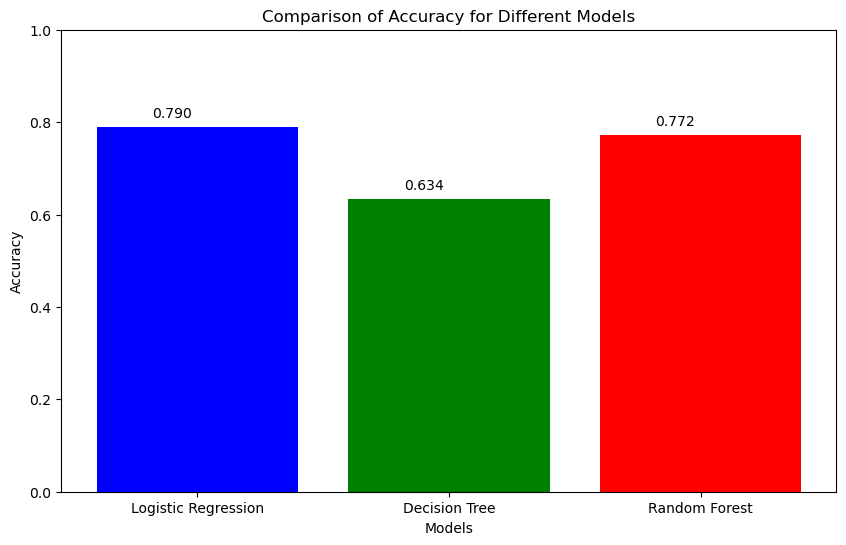

In [403]:
import matplotlib.pyplot as plt

# Models and corresponding accuracy values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
accuracy_values = [0.79, 0.6341, 0.7723]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
bars = plt.bar(models, accuracy_values, color=['blue', 'green', 'red'])
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Comparison of Accuracy for Different Models')
plt.ylim(0, 1)  # Set the y-axis limit to better compare values

# Annotating each bar with its accuracy value
for bar, accuracy in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.1, bar.get_height() + 0.02, f'{accuracy:.3f}', ha='center')

plt.show()



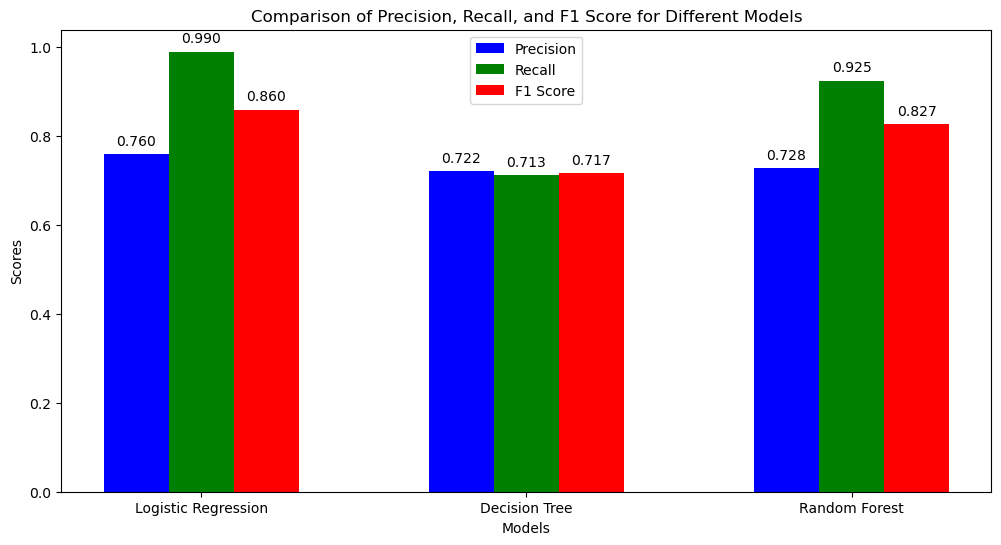

In [376]:
import matplotlib.pyplot as plt
import numpy as np

# Models and corresponding metric values
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precision_values = [0.76, 0.7215, 0.7275]
recall_values = [0.99, 0.7125, 0.9250]
f1_values = [0.86, 0.7170, 0.8268]

bar_width = 0.2
index = np.arange(len(models))

# Plotting the grouped bar chart
plt.figure(figsize=(12, 6))
bar1 = plt.bar(index - bar_width, precision_values, bar_width, label='Precision', color='blue')
bar2 = plt.bar(index, recall_values, bar_width, label='Recall', color='green')
bar3 = plt.bar(index + bar_width, f1_values, bar_width, label='F1 Score', color='red')

plt.xlabel('Models')
plt.ylabel('Scores')
plt.title('Comparison of Precision, Recall, and F1 Score for Different Models')
plt.xticks(index, models)
plt.legend()

# Annotating each bar with its value
for bars, values in zip([bar1, bar2, bar3], [precision_values, recall_values, f1_values]):
    for bar, value in zip(bars, values):
        plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.02, f'{value:.3f}', ha='center')

plt.show()


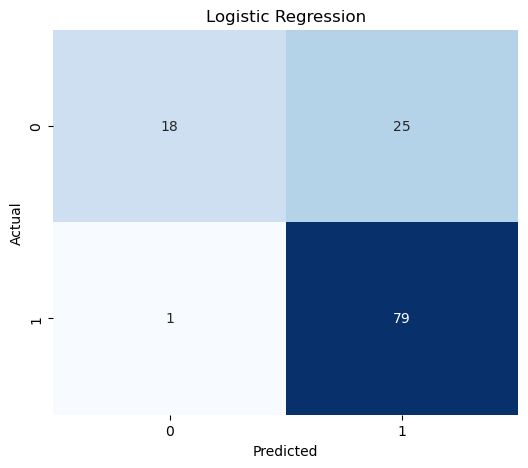

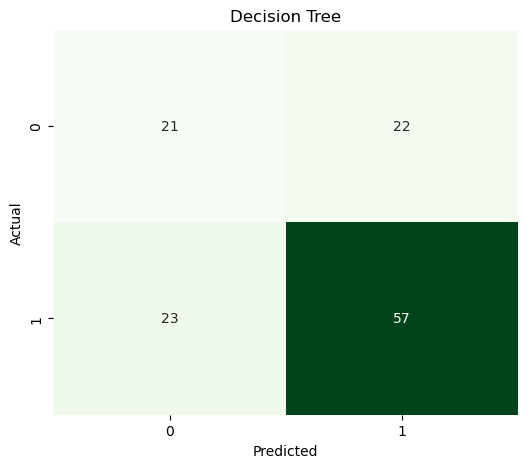

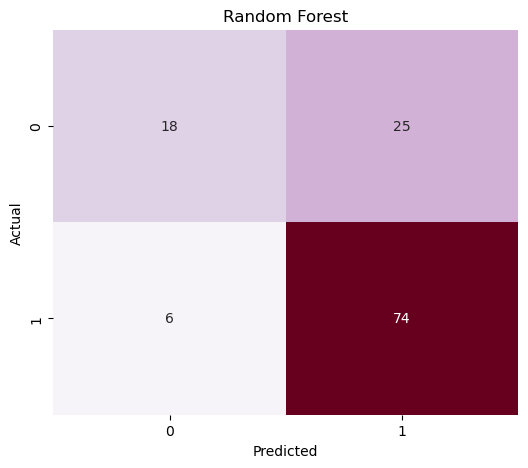

In [400]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Confusion matrices
cm_logistic_regression = np.array([[18, 25], [1, 79]])
cm_decision_tree = np.array([[21, 22], [23, 57]])
cm_random_forest = np.array([[18, 25], [6, 74]])

# Plotting Logistic Regression Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_logistic_regression, annot=True, fmt='g', cmap='Blues', cbar=False)
plt.title('Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Decision Tree Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_decision_tree, annot=True, fmt='g', cmap='Greens', cbar=False)
plt.title('Decision Tree')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Plotting Random Forest Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm_random_forest, annot=True, fmt='g', cmap='PuRd', cbar=False)
plt.title('Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
